<a href="https://colab.research.google.com/github/adarshukla3005/Auto_Segmentation_of_Images/blob/main/Auto_Segmentation_of_Images_of_3D_Cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'electron-microscopy-3d-segmentation:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1060%2F1916%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240704%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240704T212040Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7f26d236c1b5b34b2ab723d0c2e85c089fee9897c1a8fc58ffe7141e3e3132a1f237b9c0f25d7ac6099311c0a39f9925561b6f76dc8c171530cbe1c1e180edd8ebfa9ae2f807ba4d06c7a183c544c0f8f8ae092f3d5f8c237695dc97a370744aa405401668e976afec4d0ba033e85b45de0c7dd167e07c782b108ba27a67d95c6ad032a8548d3f1d4750c8f228a470a247ce205e2e718398183b66fd90783349ce5f887a04ae3443d91b3f3e56b0ca7e70a52144073376aba4cfbbb774658f6ee467b0f667bbb654d475f801264cc84ed1c9508fbb03d97f65bc244376cb37b305e36a14b71625fd72aa642b888f7313d89b25b3cd41d7e6e7e0e3920f259528,chest-xray-masks-and-labels:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F108201%2F258315%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240704%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240704T212040Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7551755b95626ddc2c04a17fea3a8f7814df7e76340743037deb9c9f5908ba696ed4b8f838e80d45168b183061223c0c95bed4fb90edac664787da6e84abe9c6395917d1fb59eeb785e53d933150bea1d610dac15a238222d5293e20f6b0d47823193d3ec8873cd38e2ef4f9c03afa2bf158cb3506136a9163fea2a17a6efbbbca714dff9dd704d0bf9dcc92dfafea9f0bd2001e540928c01c44e092fbbfc29f72601a947a33ffef55fd43d2563238fbcd9a360714a6cbee63af3c96789a2f6fb8b6da31752d06a16f08676450a917e4ff90da119a28d82d454032d5a4a1443425939cd2a489664c7c3b9cf8b018f7a3fba96f676bf14cab031ed1a16cb32e9b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 225260530 bytes downloaded
Downloaded and uncompressed: electron-microscopy-3d-segmentation
[==================================================] 10281955076 bytes downloaded
Downloaded and uncompressed: chest-xray-masks-and-labels
Data source import complete.


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from skimage import io

import cv2
from PIL import Image
import random

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import make_grid, save_image
import torchvision.transforms.functional as TF
from torchvision import transforms
import albumentations as A

In [3]:
root_dir = '../input/electron-microscopy-3d-segmentation/'
train_path = root_dir + 'training.tif'
train_gt_path = root_dir + 'training_groundtruth.tif'
test_path = root_dir + 'testing.tif'
test_gt_path = root_dir + 'testing_groundtruth.tif'

# Creating our custom Dataset and DataLoader

In [4]:
class EPFLDataset(Dataset):
    def __init__(self, image_size, train_path, train_gt_path, train=True, tfms=None):
        self.image_size = image_size
        self.train_path = train_path
        self.train_gt_path = train_gt_path
        self.train = train
        self.tfms = tfms

        self.train_stack = io.imread(train_path)
        self.train_gt_stack = io.imread(train_gt_path)

        self.num_stacks, self.x_size, self.y_size = self.train_stack.shape

        self.dataset_len = int(self.num_stacks * ((self.x_size*self.y_size)/(self.image_size ** 2)))
        self.train_len = int(0.8 * self.dataset_len)
        self.val_len = self.dataset_len - self.train_len

        idx_list = list(range(self.dataset_len))
        random.Random(42).shuffle(idx_list)

        self.train_idxs = idx_list[:self.train_len]
        self.val_idxs = idx_list[self.train_len:]
    def __len__(self):
        if self.train:
            return self.train_len
        else:
            return self.val_len

    def __getitem__(self, idx):
        image_num = self.train_idxs[idx] if self.train else self.val_idxs[idx]
        images_single_stack = (self.x_size * self.y_size)/(self.image_size * self.image_size)
        num_rows = self.x_size/self.image_size
        num_cols = self.y_size/self.image_size
        stack_num = int(image_num/images_single_stack)
        image_num_in_stack = image_num % (images_single_stack)
        row_num = int(image_num_in_stack/num_cols)
        col_num = image_num_in_stack % num_rows

        start_row = int(row_num*self.image_size)
        end_row = int(start_row + self.image_size)

        start_col = int(col_num*self.image_size)
        end_col = int(start_col + self.image_size)

        img = self.train_stack[stack_num, start_row:end_row, start_col:end_col]
        img = img.reshape(-1, 256, 256)
        #img = np.expand_dims(img, -1)
        img = img.astype('float32')
        img = torch.from_numpy(img)

        mask = self.train_gt_stack[stack_num, start_row:end_row, start_col:end_col]
        mask = mask.reshape(-1, 256, 256)
        #mask = np.expand_dims(mask, -1)
        mask = np.where(mask == 255, 1, 0)
        mask = mask.astype('float32')
        mask = torch.from_numpy(mask)
        mask = mask.type(torch.LongTensor)

        ret_value = {
            'image':img,
            'mask':mask
        }

        return ret_value

In [5]:
tfms_img = transforms.Compose(
    [
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]
)

tfms_mask = transforms.Compose(
    [
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ]
)

tfms = {
    'img':tfms_img,
    'mask':tfms_mask
}

image_size = 256

train_dataset = EPFLDataset(image_size, train_path, train_gt_path, train=True, tfms=tfms)
val_dataset = EPFLDataset(image_size, train_path, train_gt_path, train=False, tfms=tfms)

In [6]:
train_loader = DataLoader(dataset=train_dataset, batch_size=4, shuffle=True, num_workers=2)
val_loader = DataLoader(dataset=val_dataset, batch_size=4, shuffle=True, num_workers=2)

In [7]:
def imshow(img, mask=False):
    img = img.cpu().clone().detach().numpy()
    img = img.transpose(1, 2, 0)
    print(img.shape)

    if mask:
        img = img * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    else:
        img = img * np.array((1.0, 1.0, 1.0))

    img  = img.clip(0, 1)
    return img

In [8]:
print(len(train_dataset))

1584


0 torch.Size([4, 1, 256, 256]) torch.Size([4, 1, 256, 256])
tensor([[[[144., 155., 166.,  ..., 144., 121., 124.],
          [167., 187., 161.,  ..., 125., 131., 101.],
          [174., 153., 178.,  ..., 121., 120.,  96.],
          ...,
          [178., 174., 179.,  ..., 175., 161., 152.],
          [183., 164., 154.,  ..., 175., 163., 161.],
          [186., 176., 192.,  ..., 140., 155., 129.]]],


        [[[107., 128., 141.,  ..., 193., 196., 185.],
          [ 99., 147., 129.,  ..., 175., 189., 195.],
          [149., 117., 134.,  ..., 186., 196., 217.],
          ...,
          [156., 172., 162.,  ...,  99.,  86.,  80.],
          [170., 175., 159.,  ...,  79.,  96.,  77.],
          [166., 185., 175.,  ..., 107.,  85.,  75.]]],


        [[[128., 165., 161.,  ..., 128., 116.,  93.],
          [139., 136., 165.,  ..., 132., 124., 108.],
          [168., 165., 177.,  ..., 119.,  97., 122.],
          ...,
          [ 95., 119., 135.,  ..., 182., 166., 178.],
          [106., 117., 

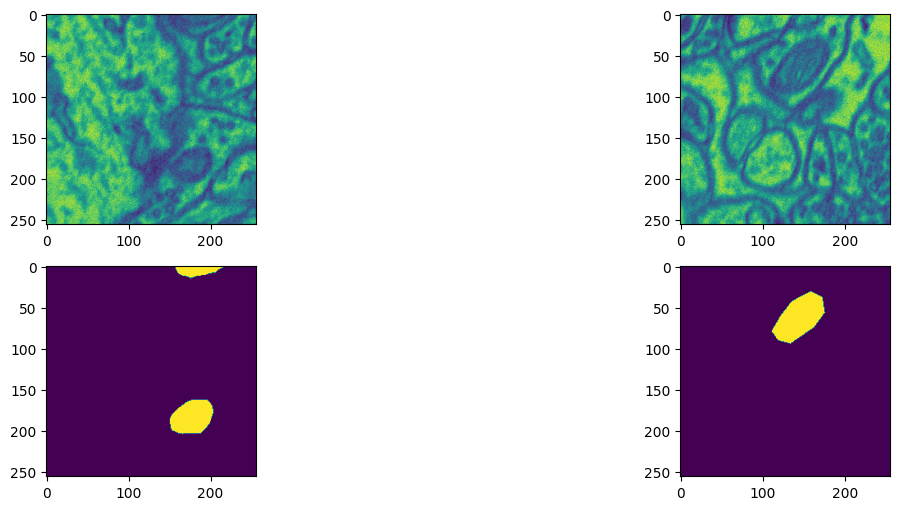

In [9]:
fig = plt.figure(figsize = (15,6))
for ith_batch, sample_batched in enumerate(train_loader):
    print(ith_batch, sample_batched['image'].size(), sample_batched['mask'].size())
    print(sample_batched['image'])
    print(sample_batched['mask'])

    for index in range(2):
        ax = fig.add_subplot(2, 2 , index + 1)  # subplot index starts from 1
        plt.imshow(sample_batched['image'][index].permute(1, 2, 0))
        ax = fig.add_subplot(2, 2, index + 3)
        plt.imshow(sample_batched['mask'][index].permute(1, 2, 0))
    break

# Architecture of the Pix2Pix

In [10]:
class DownConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel=4, strides=2, padding=1, activation=True, batchnorm=True):
        """
        The paper uses:
        - Convolutions of 4x4 spatial filters applied with stride of 2
        - Encoder downsampling by a factor of 2
        """
        super().__init__()
        self.activation = activation
        self.batchnorm = batchnorm

        self.conv = nn.Conv2d(in_channels, out_channels, kernel, strides, padding)

        if self.batchnorm:
            self.bn = nn.BatchNorm2d(out_channels)

        if self.activation:
            self.relu = nn.LeakyReLU(0.2)

    def forward(self, x):
        x = self.conv(x)
        if self.batchnorm:
            x = self.bn(x)
        if self.activation:
            x = self.relu(x)
        return x

In [11]:
class UpConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel=4, strides=2, padding=1, activation=True, batchnorm=True, dropout=False):
        super().__init__()
        self.activation = activation
        self.batchnorm = batchnorm
        self.dropout = dropout

        self.deconv = nn.ConvTranspose2d(in_channels, out_channels, kernel, strides, padding)

        if self.batchnorm:
            self.bn = nn.BatchNorm2d(out_channels)

        if self.activation:
            self.relu = nn.ReLU(True)

        if self.dropout:
            self.drop = nn.Dropout2d(0.5)

    def forward(self, x):
        x = self.deconv(x)
        if self.batchnorm:
            x = self.bn(x)
        if self.relu:
            x = self.relu(x)
        if self.dropout:
            x = self.drop(x)
        return x

In [12]:
class Discriminator(nn.Module):
    def __init__(self, input_channels):
        super().__init__()
        self.d1 = DownConv(input_channels, 64, batchnorm=False)
        self.d2 = DownConv(64, 128)
        self.d3 = DownConv(128, 256)
        self.d4 = DownConv(256, 512)
        self.final = nn.Conv2d(512, 1, kernel_size=1)

    def forward(self, x, y):
        x = torch.cat([x, y], axis=1)
        x0 = self.d1(x)
        x1 = self.d2(x0)
        x2 = self.d3(x1)
        x3 = self.d4(x2)
        xn = self.final(x3)
        return xn

In [13]:
class Generator(nn.Module):
    def __init__(self, input_channels, output_channels):
        super().__init__()

        self.encoders = [
            DownConv(input_channels, 64, batchnorm=False), #batch_size x 64 x 128 x 128
            DownConv(64, 128),
            DownConv(128, 256),
            DownConv(256, 512),
            DownConv(512, 512),
            DownConv(512, 512),
            DownConv(512, 512),
            DownConv(512, 512, batchnorm=False)
        ]

        self.decoders = [
            UpConv(512, 512, dropout=True),
            UpConv(1024, 512, dropout=True),
            UpConv(1024, 512, dropout=True),
            UpConv(1024, 512),
            UpConv(1024, 256),
            UpConv(512, 128),
            UpConv(256, 64)
        ]

        self.dec_channels = [512, 512, 512, 512, 256, 128, 64]
        self.final_conv = nn.ConvTranspose2d(64, output_channels, kernel_size=4, stride=2, padding=1)
        self.tanh = nn.Tanh()

        self.encoders = nn.ModuleList(self.encoders)
        self.decoders = nn.ModuleList(self.decoders)

    def forward(self, x):
        skip_conns = []
        for encoder in self.encoders:
            x = encoder(x)
            skip_conns.append(x)

        skip_conns = list(reversed(skip_conns[:-1]))
        decoders = self.decoders[:-1]

        for decoder, skip in zip(decoders, skip_conns):
            x = decoder(x)
            # print(x.shape, skip.shape)
            x = torch.cat((x, skip), axis=1)

        x = self.decoders[-1](x)
        # print(x.shape)
        x = self.final_conv(x)
        return self.tanh(x)

In [14]:
def sanity_check():
    x = torch.randn((1, 1, 256, 256))
    y = torch.randn((1, 1, 256, 256))
    gen1 = Generator(1, 1)
    pred_gen = gen1(x)
    print("Generator Output", pred_gen.shape)

sanity_check()

Generator Output torch.Size([1, 1, 256, 256])


In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

disc = Discriminator(input_channels=2).to(device)
gen = Generator(input_channels=1, output_channels=1).to(device)

disc_opt = optim.Adam(disc.parameters(), lr=0.0001, betas=(0.5, 0.99))
gen_opt = optim.Adam(gen.parameters(), lr=0.0001, betas=(0.5, 0.99))

BCE = nn.BCEWithLogitsLoss()
L1 = nn.L1Loss()

cuda


In [16]:
def train_disc(disc, gen, imgs, masks, loss, disc_opt):
    disc.train()

    fake_masks = gen(imgs)
    disc_real = disc(imgs, masks) #generate discriminator output for X-Ray and corresponding ground truth mask
    disc_fake = disc(imgs, fake_masks.detach()) #generate disc output for X-Ray and produced mask

    #calculate the loss
    disc_real_loss = BCE(disc_real, torch.ones_like(disc_real))
    disc_fake_loss = BCE(disc_real, torch.zeros_like(disc_fake))
    disc_loss = (disc_real_loss+disc_fake_loss)/2

    disc.zero_grad()

    disc_loss.backward()

    disc_opt.step()

    return fake_masks, disc_loss

In [17]:
def train_gen(disc, gen, imgs, masks, fake_masks, loss_bce, loss_l1, gen_opt):
    gen.train()

    disc_fake = disc(imgs, fake_masks.detach())

    gen_fake_loss = BCE(disc_fake, torch.ones_like(disc_fake))
    l1 = L1(fake_masks, masks)*100
    gen_loss = gen_fake_loss + l1

    gen_opt.zero_grad()
    gen_loss.backward()
    gen_opt.step()

    return gen_loss

In [18]:
def save_img(gen, valid_dataloader, device, epoch_num, dir_path):
    if os.path.exists(dir_path) == False:
        os.makedirs(dir_path)

    sample = next(iter(valid_dataloader))
    imgs = sample['image']
    masks = sample['mask']
    batch_size = imgs.shape[0]
    imgs = imgs.to(device)
    masks = masks.to(device)

    gen.eval()

    with torch.no_grad():
        fake_masks = gen(imgs)
        fake_mask_grid = make_grid(fake_masks, nrow=4)
        real_mask_grid = make_grid(masks, nrow=4)

        save_image(fake_mask_grid, dir_path + f'/fake_masks_{epoch_num}.png')
        save_image(real_mask_grid.float(), dir_path + f'/real_masks_{epoch_num}.png')
        #print("Saved intermediate images\n")

In [19]:
def train(gen,
         disc,
         train_dataloader,
         val_dataloader,
         loss_bce,
         loss_l1,
         num_epochs,
         gen_opt,
         disc_opt,
         device,
         dir_path
         ):
    gen_losses = []
    disc_losses = []

    num_steps = len(train_dataloader)
    step = 0

    for epoch in range(num_epochs):
        for i, sample in enumerate(train_dataloader):
            imgs = sample['image'].to(device)
            masks = sample['mask'].to(device)
            ##print(masks.size())

            fake_masks, disc_loss = train_disc(disc, gen, imgs, masks, loss_bce, disc_opt)
            gen_loss = train_gen(disc, gen, imgs, masks, fake_masks, loss_bce, loss_l1, gen_opt)

            if i%20 == 0:
                disc_losses.append(disc_loss.item())
                gen_losses.append(gen_loss.item())

                print('Epoch [{}/{}], Step [{}/{}], Discriminator Loss: {:.4f}, Generator Loss: {:.4f}'.format(epoch, num_epochs, i, num_steps, disc_loss.item(), gen_loss.item()))
                step+=1

            save_img(gen, val_dataloader, device, epoch, dir_path)

    ret_value = {"disc_loss": disc_losses, "gen_loss": gen_losses}
    return ret_value

In [20]:
history = train(gen, disc, train_loader, val_loader, BCE, L1, 50, gen_opt, disc_opt, device, 'results')

Epoch [0/50], Step [0/396], Discriminator Loss: 0.7102, Generator Loss: 70.3194
Epoch [0/50], Step [20/396], Discriminator Loss: 0.6967, Generator Loss: 73.2173
Epoch [0/50], Step [40/396], Discriminator Loss: 0.6957, Generator Loss: 36.4634
Epoch [0/50], Step [60/396], Discriminator Loss: 0.6955, Generator Loss: 25.3068
Epoch [0/50], Step [80/396], Discriminator Loss: 0.6958, Generator Loss: 20.6072
Epoch [0/50], Step [100/396], Discriminator Loss: 0.6943, Generator Loss: 17.6070
Epoch [0/50], Step [120/396], Discriminator Loss: 0.6956, Generator Loss: 20.4826
Epoch [0/50], Step [140/396], Discriminator Loss: 0.6940, Generator Loss: 13.0663
Epoch [0/50], Step [160/396], Discriminator Loss: 0.6941, Generator Loss: 13.1742
Epoch [0/50], Step [180/396], Discriminator Loss: 0.6940, Generator Loss: 11.1198
Epoch [0/50], Step [200/396], Discriminator Loss: 0.6937, Generator Loss: 13.8997
Epoch [0/50], Step [220/396], Discriminator Loss: 0.6936, Generator Loss: 9.9554
Epoch [0/50], Step [240

In [21]:
if os.path.exists('checkpoints'):
    os.makedirs('checkpoints')
torch.save(gen.state_dict(), 'gen_em_50.pth')
torch.save(disc.state_dict(), 'disc_em_50.pth')

Text(0.5, 1.0, 'Loss during training')

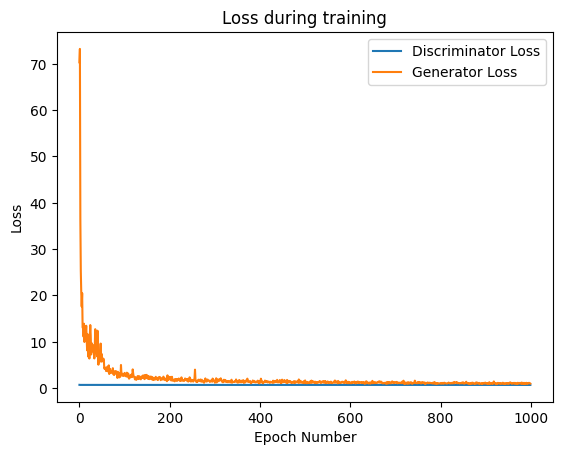

In [22]:
plt.plot(history['disc_loss'], '-')
plt.plot(history['gen_loss'], '-')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.legend(['Discriminator Loss', 'Generator Loss'])
plt.title('Loss during training')

# Model Inference
Now that the model is trained, time to test it on the test set

In [23]:
gen.eval()
disc.eval()

Discriminator(
  (d1): DownConv(
    (conv): Conv2d(2, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (relu): LeakyReLU(negative_slope=0.2)
  )
  (d2): DownConv(
    (conv): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): LeakyReLU(negative_slope=0.2)
  )
  (d3): DownConv(
    (conv): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): LeakyReLU(negative_slope=0.2)
  )
  (d4): DownConv(
    (conv): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): LeakyReLU(negative_slope=0.2)
  )
  (final): Conv2d(512, 1, kernel_size=(1, 1), stride=(1, 1))
)

In [24]:
test_stack = io.imread(test_path)
test_gt_stack = io.imread(test_gt_path)

In [25]:
class EPFLTestDataset(Dataset):
    def __init__(self, image_size, train_path, train_gt_path, tfms=None):
        self.image_size = image_size
        self.train_path = train_path
        self.train_gt_path = train_gt_path
        self.train = train
        self.tfms = tfms

        self.train_stack = io.imread(train_path)
        self.train_gt_stack = io.imread(train_gt_path)

        self.num_stacks, self.x_size, self.y_size = self.train_stack.shape

        self.dataset_len = int(self.num_stacks * ((self.x_size*self.y_size)/(self.image_size ** 2)))

    def __len__(self):
        return self.dataset_len

    def __getitem__(self, idx):
        image_num = idx
        images_single_stack = (self.x_size * self.y_size)/(self.image_size * self.image_size)
        num_rows = self.x_size/self.image_size
        num_cols = self.y_size/self.image_size
        stack_num = int(image_num/images_single_stack)
        image_num_in_stack = image_num % (images_single_stack)
        row_num = int(image_num_in_stack/num_cols)
        col_num = image_num_in_stack % num_rows

        start_row = int(row_num*self.image_size)
        end_row = int(start_row + self.image_size)

        start_col = int(col_num*self.image_size)
        end_col = int(start_col + self.image_size)

        img = self.train_stack[stack_num, start_row:end_row, start_col:end_col]
        img = img.reshape(-1, 256, 256)
        #img = np.expand_dims(img, -1)
        img = img.astype('float32')
        img = torch.from_numpy(img)

        mask = self.train_gt_stack[stack_num, start_row:end_row, start_col:end_col]
        mask = mask.reshape(-1, 256, 256)
        #mask = np.expand_dims(mask, -1)
        mask = np.where(mask == 255, 1, 0)
        mask = mask.astype('float32')
        mask = torch.from_numpy(mask)
        mask = mask.type(torch.LongTensor)

        ret_value = {
            'image':img,
            'mask':mask
        }

        return ret_value

In [26]:
tfms_img = transforms.Compose(
    [
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]
)

tfms_mask = transforms.Compose(
    [
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ]
)

tfms = {
    'img':tfms_img,
    'mask':tfms_mask
}

image_size = 256

test_dataset = EPFLTestDataset(image_size, test_path, test_gt_path, tfms=tfms)

In [27]:
test_loader = DataLoader(dataset=test_dataset, batch_size=2)

torch.Size([2, 1, 256, 256])


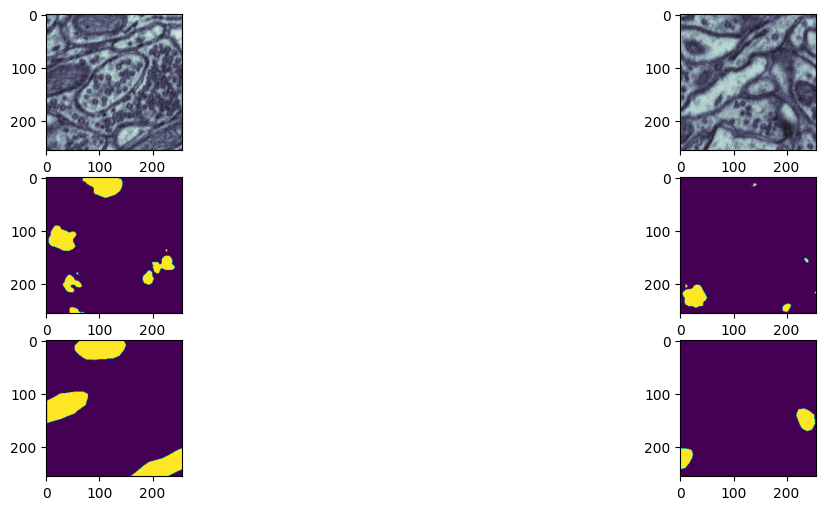

In [28]:
fig = plt.figure(figsize = (15, 6))

for i, sample in enumerate(test_loader):
    test_input = sample['image'].to(device)
    print(test_input.size())
    test_output = (gen(test_input)+0.5).int().float()
    test_gt = sample['mask'].to(device)

    for index in range(2):
        fig.add_subplot(3, 2, index+1)
        temp_input = test_input[index].cpu().clone().detach().numpy()
        temp_input = temp_input.transpose(1, 2, 0)
        plt.imshow(temp_input, cmap='bone')

        fig.add_subplot(3, 2, index+3)
        temp_output = test_output[index].cpu().clone().detach().numpy()
        temp_output = temp_output.transpose(1, 2, 0)
        plt.imshow(temp_output)

        fig.add_subplot(3, 2, index+5)
        temp_gt = test_gt[index].cpu().clone().detach().numpy()
        temp_gt = temp_gt.transpose(1, 2, 0)
        plt.imshow(temp_gt)
    break

In [29]:
def dice_index(fake_mask, real_mask):
    smooth = 0.000001
    size_of_batch = fake_mask.size(0)

    p1 = fake_mask.view(size_of_batch, -1)
    p2 = real_mask.view(size_of_batch, -1)

    intersection = (p1 * p2).sum()

    dice =  ((2.0 * intersection )+ smooth) / (p1.sum() + p2.sum() + smooth)
    #dice.requires_grad = True

    return dice

In [30]:
def calc_avg_dice_index(gen, dataloader):

    dice = 0.0
    gen.eval()

    with torch.no_grad():
        for ith_batch, sample_batched in enumerate(dataloader):

            X_train = sample_batched['image'].to('cuda')
            y_train = sample_batched['mask'].to('cuda')

            y_predict = (gen(X_train) + 0.5).int().float()

            dice += dice_index(y_predict, y_train)



    avg_dice = dice / len(dataloader)
    return avg_dice.item()

In [31]:
gen.load_state_dict(torch.load('./gen_em_50.pth'))

<All keys matched successfully>

In [32]:
avg_dice_index = calc_avg_dice_index(gen, test_loader)
print("Average DICE Index is", avg_dice_index)

Average DICE Index is 0.2888122797012329
